In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import sqlite3
from sqlite3 import Error
import datetime as dt
%matplotlib inline

In [2]:
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)

    return conn

In [3]:
def load_into_db(conn,fname):
    for line in open(fname):
        date,temp,rh = line.rstrip().split("\t")
        sql = ''' INSERT INTO data (date, temp, rh) VALUES (?, ?, ?) '''
        c = conn.cursor()
        try:
            c.execute(sql,(date,temp,rh))
        except sqlite3.IntegrityError:
            return
        conn.commit()

In [4]:
#db = r"/Users/alberto/Desktop/Datalogger/datalogger.db"
db = r"datalogger.db"
conn = create_connection(db)

sql_data_table = """ CREATE TABLE IF NOT EXISTS data (
date text PRIMARY KEY,
temp float,
rh float
);
"""
c = conn.cursor()
c.execute(sql_data_table)

load_into_db(conn,"DATA.LOG")

data = pd.read_sql_query("SELECT * from data", conn)
conn.close()

data.date = pd.to_datetime(data.date)

In [5]:
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator()
hours = mdates.HourLocator()
minutes = mdates.MinuteLocator()
fmt = mdates.DateFormatter('%Y-%m-%d')
fmt2 = mdates.DateFormatter('%H:%M')

/Users/alberto/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Second argument 'rh' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  if __name__ == '__main__':


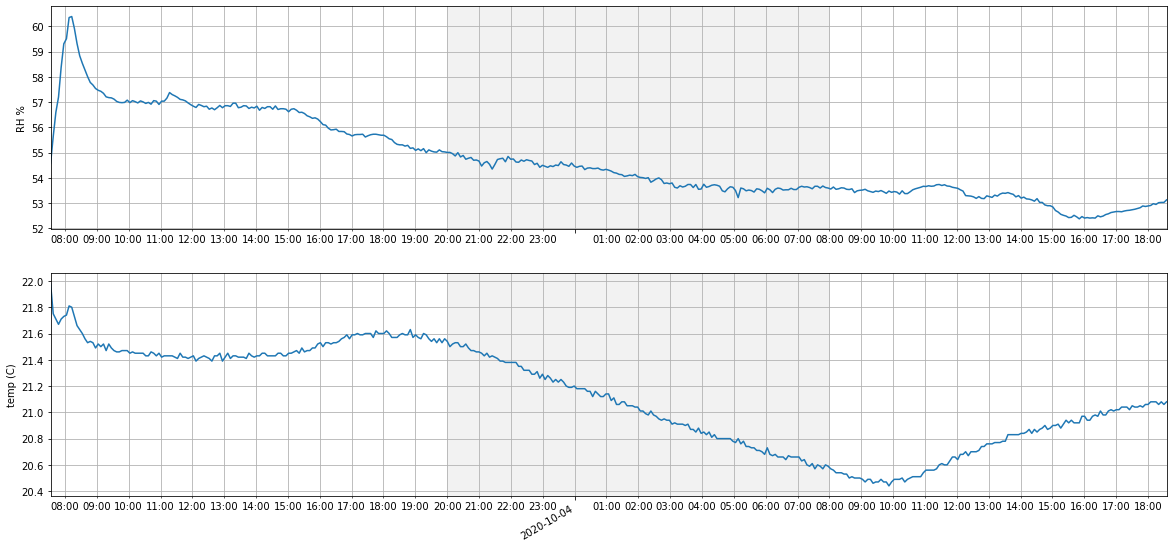

In [49]:
start = data.date.min()
end = data.date.max()

#start = dt.datetime(2020,10,3,7,0)
#end = dt.datetime(2020,10,4,9,0)


fig, axs = plt.subplots(2,1,figsize=(20,10))
axs[0].plot('date', 'rh', data=data)

# format the ticks
axs[0].xaxis.set_major_locator(days)
axs[0].xaxis.set_minor_locator(hours)
axs[0].xaxis.set_major_formatter(fmt)
axs[0].xaxis.set_minor_formatter(fmt2)
axs[0].set_ylabel('RH %')

axs[1].plot('date', 'temp', data=data)

span_start = dt.datetime(start.year, start.month, start.day, 20)
while span_start < end:
    span_end = span_start + dt.timedelta(0.5)
    for ax in axs:
        ax.axvspan(span_start,span_end,color='grey',alpha=0.1)
    span_start = span_start + dt.timedelta(1)

# format the ticks
axs[1].xaxis.set_major_locator(days)
axs[1].xaxis.set_minor_locator(hours)
axs[1].xaxis.set_major_formatter(fmt)
axs[1].xaxis.set_minor_formatter(fmt2)
axs[1].set_ylabel('temp (C)')

for ax in axs:
    ax.grid(which='both')
    ax.set_xlim(start,end)

fig.autofmt_xdate()